In [103]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Load data

In [2]:
df_all = pd.read_excel("data/eDEP Submittals All 1-8-2018.xlsx")

In [187]:
df_101 = pd.read_excel("data/607_BWSC101 Release Log Form.xlsx")

In [76]:
df_101.shape

(573, 251)

### Filter data

In [4]:
df_all.head()

,RTN,Town,Site Name,Notified,Status,Form Name,Submittal,Received,Transaction,Link
0,1-0019842,WILLIAMSTOWN,MT GREYLOCK REGIONAL HIGH SCHOOL,2015-10-30,PSNC,BWSC128 Recording Receipt/Issuance Form,Notice of Responsibility,5201-11-05 00:00:00,787366,Link
1,4-0000847,WELLFLEET,MOBIL STATION 01-N3T,1989-02-03,RAO,BWSC128 Recording Receipt/Issuance Form,L1 Audit,3015-02-13 00:00:00,749428,Link
2,3-0032085,WELLESLEY,WELLESLEY OFFICE PARK,2014-04-08,RAONR,BWSC128 Recording Receipt/Issuance Form,Other RA Related Document and/or Activity,3014-06-25 00:00:00,678147,Link
3,4-0025256,FOXBOROUGH,CUMBERLAND FARMS,2014-07-28,PSC,BWSC128 Recording Receipt/Issuance Form,L1 Audit,2916-03-24 00:00:00,820773,Link
4,1-0019308,NORTHAMPTON,INTERSTATE 91 MEDIAN,2014-01-06,PSNC,BWSC128 Recording Receipt/Issuance Form,Any Other Submittal Received by MassDEP,2915-12-21 00:00:00,798995,Link


In [105]:
status = df_all["Status"].groupby(df_all["Status"]).count()

In [117]:
status

Status
ADQREG      931
DEPMOU        8
DEPNDS       49
DEPNFA      167
DPS        2065
DPSTRM      196
INVSUB      493
LSPNFA       14
PENNFA        5
PSC       13326
PSNC      35432
RAO       80980
RAONR     12185
REMOPS    26543
ROSTRM     2133
SPECPR      245
STMRET     1461
TCLASS      219
TIER1D     3608
TIERI     10009
TIERII    16409
TMPS       7009
UNCLSS     3770
URAM       4680
WCSPRM      109
Name: Status, dtype: int64

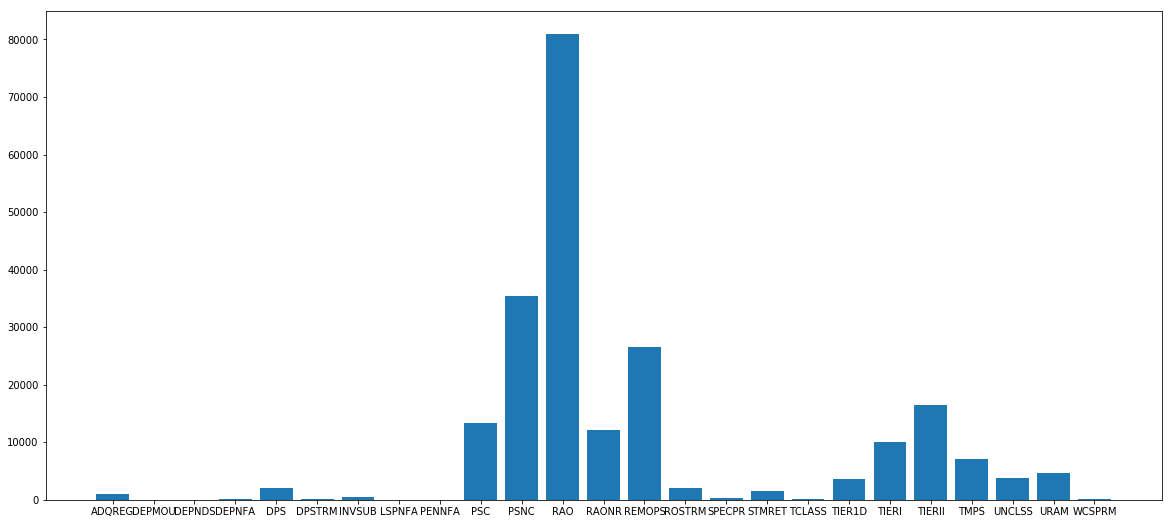

In [116]:
xaxis = [i+1 for i in range(len(status.index))]
xlabel = status.index
plt.figure(figsize=(20, 9))
plt.bar(xaxis, status.values)
plt.xticks(xaxis, xlabel)
plt.show()
#plt.bar()

In [55]:
def completeRTN(row):
    tr = str(row["TRACKING_REGION_NUMBER"])
    tn = str(row["TRACKING_NUMBER"])
    if len(tn) < 7:
        tn = ("0" * (7 - len(tn))) + tn
    return tr + "-" + tn

In [57]:
df_101["RTN"] = df_101.apply(completeRTN, axis=1)

In [20]:
df_tiers = df_all[((df_all["Status"] == "TIERI") | (df_all["Status"] == "TIERII")) & ]

In [80]:
df_101_tier = df_101.set_index("RTN").join(df_tiers.set_index("RTN"), how="inner")

In [83]:
df_101_tier

,FORM_DATA_ID,DEP_TRACKING_ID,TR_SUBMIT_DATE,TR_RECEIVED_DATE,TR_SIGN_DATE,TR_CREATE_DATE,TR_PROCESS_DATE,TR_PROCESS_STATUS,A1,A1AM,...,TRACKING_REGION_NUMBER,Town,Site Name,Notified,Status,Form Name,Submittal,Received,Transaction,Link
RTN,,,,,,,,,,,,,,,,,,,,,
1-0020229,6474063,916277,2017-04-07 13:20:43,2017-04-07 13:36:18,2017-04-07 13:20:40,2017-04-07 13:16:43,2017-04-07 14:09:20,EPICS_EXP,NaN,N,...,1,HOLYOKE,FORMER MT. TOM POWER PLANT,2017-04-07,TIERII,BWSC108 CRA Transmittal Form & Phase I CS,Phase II SOW,2017-11-16 00:00:00,971977,Link
1-0020229,6474063,916277,2017-04-07 13:20:43,2017-04-07 13:36:18,2017-04-07 13:20:40,2017-04-07 13:16:43,2017-04-07 14:09:20,EPICS_EXP,NaN,N,...,1,HOLYOKE,FORMER MT. TOM POWER PLANT,2017-04-07,TIERII,BWSC102 Release Amendment Form,Field Response - Direct Oversight,2017-07-13 00:00:00,941605,Link
1-0020229,6474063,916277,2017-04-07 13:20:43,2017-04-07 13:36:18,2017-04-07 13:20:40,2017-04-07 13:16:43,2017-04-07 14:09:20,EPICS_EXP,NaN,N,...,1,HOLYOKE,FORMER MT. TOM POWER PLANT,2017-04-07,TIERII,BWSC102 Release Amendment Form,Record Other Staff Actiivities not specified a...,2017-07-13 00:00:00,941605,Link
1-0020229,6474063,916277,2017-04-07 13:20:43,2017-04-07 13:36:18,2017-04-07 13:20:40,2017-04-07 13:16:43,2017-04-07 14:09:20,EPICS_EXP,NaN,N,...,1,HOLYOKE,FORMER MT. TOM POWER PLANT,2017-04-07,TIERII,BWSC126 Miscellaneous Document Transmittal Form,Other Documents,2017-07-05 00:00:00,936647,Link
1-0020229,6474063,916277,2017-04-07 13:20:43,2017-04-07 13:36:18,2017-04-07 13:20:40,2017-04-07 13:16:43,2017-04-07 14:09:20,EPICS_EXP,NaN,N,...,1,HOLYOKE,FORMER MT. TOM POWER PLANT,2017-04-07,TIERII,BWSC107 Tier Classification Transmittal Form,Phase I Completion Statement,2017-06-23 00:00:00,931934,Link
1-0020229,6474063,916277,2017-04-07 13:20:43,2017-04-07 13:36:18,2017-04-07 13:20:40,2017-04-07 13:16:43,2017-04-07 14:09:20,EPICS_EXP,NaN,N,...,1,HOLYOKE,FORMER MT. TOM POWER PLANT,2017-04-07,TIERII,BWSC107 Tier Classification Transmittal Form,Tier Classification Submittal - Tier II,2017-06-23 00:00:00,931934,Link
1-0020229,6474063,916277,2017-04-07 13:20:43,2017-04-07 13:36:18,2017-04-07 13:20:40,2017-04-07 13:16:43,2017-04-07 14:09:20,EPICS_EXP,NaN,N,...,1,HOLYOKE,FORMER MT. TOM POWER PLANT,2017-04-07,TIERII,BWSC107 Tier Classification Transmittal Form,Phase II SOW,2017-06-23 00:00:00,931934,Link
1-0020229,6474063,916277,2017-04-07 13:20:43,2017-04-07 13:36:18,2017-04-07 13:20:40,2017-04-07 13:16:43,2017-04-07 14:09:20,EPICS_EXP,NaN,N,...,1,HOLYOKE,FORMER MT. TOM POWER PLANT,2017-04-07,TIERII,BWSC128 Recording Receipt/Issuance Form,Written Plan Approval,2017-06-05 00:00:00,931362,Link
1-0020229,6474063,916277,2017-04-07 13:20:43,2017-04-07 13:36:18,2017-04-07 13:20:40,2017-04-07 13:16:43,2017-04-07 14:09:20,EPICS_EXP,NaN,N,...,1,HOLYOKE,FORMER MT. TOM POWER PLANT,2017-04-07,TIERII,BWSC126 Miscellaneous Document Transmittal Form,Other Documents,2017-05-18 00:00:00,925611,Link


In [82]:
df_101_tier.shape

(25, 259)

In [93]:
df_101_tier.iloc[:, 5:15].head()

,TR_CREATE_DATE,TR_PROCESS_DATE,TR_PROCESS_STATUS,A1,A1AM,A1PM,A2,A2A,A2B,A3
RTN,,,,,,,,,,
1-0020229,2017-04-07 13:16:43,2017-04-07 14:09:20,EPICS_EXP,NaN,N,Y,Y,Y,N,N
1-0020229,2017-04-07 13:16:43,2017-04-07 14:09:20,EPICS_EXP,NaN,N,Y,Y,Y,N,N
1-0020229,2017-04-07 13:16:43,2017-04-07 14:09:20,EPICS_EXP,NaN,N,Y,Y,Y,N,N
1-0020229,2017-04-07 13:16:43,2017-04-07 14:09:20,EPICS_EXP,NaN,N,Y,Y,Y,N,N
1-0020229,2017-04-07 13:16:43,2017-04-07 14:09:20,EPICS_EXP,NaN,N,Y,Y,Y,N,N


In [124]:
df_101.shape

(573, 251)

In [89]:
(df_all[df_all["Form Name"]=="BWSC101 Release Log Form"]).groupby("Status").count()["RTN"]

Status
ADQREG     163
DEPMOU       1
DEPNDS       4
DEPNFA       4
DPS        158
DPSTRM       3
INVSUB       4
PSC        467
PSNC      3351
RAO       5646
RAONR      975
REMOPS      18
ROSTRM       2
SPECPR      42
STMRET      13
TCLASS       1
TIER1D     324
TIERI      187
TIERII     530
TMPS        80
UNCLSS     650
URAM       509
Name: RTN, dtype: int64

In [133]:
coldef = df_101.dtypes

In [139]:
df_101["A1"].unique()

array([ nan])

In [135]:
coldef.to_csv("coldef.csv")

In [141]:
columndef = pd.read_csv("coldef.csv")

In [142]:
columndef.head()

,column,type,proc,desc
0,FORM_DATA_ID,int64,drop,NaN
1,DEP_TRACKING_ID,int64,drop,NaN
2,TR_SUBMIT_DATE,datetime64[ns],drop,NaN
3,TR_RECEIVED_DATE,datetime64[ns],drop,NaN
4,TR_SIGN_DATE,datetime64[ns],drop,NaN


In [153]:
df_1011 = df_101

In [195]:
# columndef[["type"]].replace({"int64": "int"})
columndef["desc"]

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7      False
8      False
9       True
10     False
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23     False
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
221     True
222     True
223     True
224     True
225    False
226     True
227     True
228     True
229     True
230     True
231     True
232     True
233     True
234     True
235     True
236     True
237     True
238     True
239    False
240     True
241     True
242     True
243     True
244    False
245     True
246     True
247     True
248     True
249     True
250     True
Name: desc, Length: 251, dtype: bool

In [151]:
columndef[columndef["column"] == "FORM_DATA_ID"]["proc"].values[0]

'drop'

In [202]:
def preprocess(df, str: coldef):
    columndef = pd.read_csv(coldef)
    for col in df.columns:
        print(col)
        proc = columndef[columndef["column"] == col]["proc"].values[0]
        
        # deal with Y/N
        if proc == "translate10":
            df[col].replace(to_replace={"Y": 1, "N": 0}, inplace=True)
            df[col] = df[col].astype(int)
        # drop column
        elif proc == "drop":
            df.drop(col, axis=1, inplace=True)
        # to be discussed
        elif proc == "?":
            df.drop(col, axis=1, inplace=True)
        # mostly float, and some str
        elif proc == "floatandstr":
            df.drop(col, axis=1, inplace=True)
        # change the type to float
        elif proc == "float":
            df[col] = df[col].astype(float)
        else:
            df.drop(col, axis=1, inplace=True)

In [203]:
coldef = "coldef.csv"
df_101 = pd.read_excel("data/607_BWSC101 Release Log Form.xlsx")

In [204]:
preprocess(df_101, coldef)

FORM_DATA_ID
DEP_TRACKING_ID
TR_SUBMIT_DATE
TR_RECEIVED_DATE
TR_SIGN_DATE
TR_CREATE_DATE
TR_PROCESS_DATE
TR_PROCESS_STATUS
A1
A1AM
A1PM
A2
A2A
A2B
A3
A3A
A3B
A3C
A3D
ACTION_DATE
ACTOR_PHONE1
AFFILIATION_TYPE_CODE
ATIME
B6
B6OTHER
B6PRP
C6A
C6B
C6C
C6D
C6E
C6F
C6G
C6H
C6I
C6J
C6K
C6L
C6M
C6N
C6NDESCRIBE
CERT_NO
CERT_SIGN_DATE
CERT_SIGN_NAME
CERT_SIGN_USERNAME
CONTACT_FIRST
CONTACT_LAST
CONTACT_PHONE
CONTRACTOR
D1
D10A
D10B
D10C
D10D
D10E
D10F
D10G
D10H
D10I
D10J
D10K
D10L
D10M
D10N
D10O
D10P
D10Q
D10R
D10S
D10T
D10U
D10USPECIFY
D11
D11AAMTORCONC
D11ACASNUMBER
D11AOHMREL
D11AOORHM
D11ARCEXCEEDED
D11AUNITS
D11BAMTORCONC
D11BCASNUMBER
D11BOHMREL
D11BOORHM
D11BRCEXCEEDED
D11BUNITS
D11CAMTORCONC
D11CCASNUMBER
D11COHMREL
D11COORHM
D11CRCEXCEEDED
D11CUNITS
D1AM
D1PM
D1TIME
D2
D2AM
D2PM
D2TIME
D3
D3AM
D3PM
D3TIME
D4A
D4B
D4C
D4D
D4E
D4F
D4G
D4H
D4I
D4J
D4JDESCRIBE
D4K
D4L
D4M
D4N
D4NSPECIFY
D6A
D6B
D6C
D6D
D6E
D6F
D6G
D6H
D7A
D7B
D7C
D7D
D7E
D7F
D8A
D8B
D8C
D8D
D9A
D9B
D9C
D9D
D9E
D9F
D9G
D9H
D

In [206]:
df_101.head()

,A1AM,A2,A2A,A2B,A3,A3A,A3B,A3C,A3D,B6OTHER,...,H4,H5,H6,H7,H8,H9,LUST_ELIGIBLE_NO,LUST_ELIGIBLE_UNKNOWN,LUST_ELIGIBLE_YES,STAFF_UNASSIGNED
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [216]:
for col in 
    print(sum(pd.isnull(df_101["A1AM"])))

0

In [207]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.svm import SVC

In [208]:
kmeans = KMeans(n_clusters=2)